# Project 5: Gravitation Inside a Star
## 5.4 Exercises
***

Importing necessary libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp, pi

## Numerical Procedures: BVP1D - Boundary Value Problem <br> - in one dimension *(mandatory)*

### 5.4.1 Numerov-Cowell's Algorithm

In [ ]:
def numerow(a, b, ndiv, y0, y1, funk, funs):
    """
    Numerov algorithm implementation for solving differential equations
    of the form y'' = f(x)y(x) + g(x).

    Parameters
    ----------
    a : float
        The lower boundary value for x.
    b : float
        The upper boundary value for x.
    ndiv : int
        The number of steps for the numerical integration.
    y0 : float
        The initial value for y at x=a.
    y1 : float
        The initial value for y at x=a+h.
    funk : function
        The function defining the f(x) term in the differential equation.
    funs : function
        The function defining the g(x) term in the differential equation.

    Returns
    -------
    xp : list
        The list of x values used in the numerical integration.
    yp : list
        The list of y values obtained from the numerical integration.
    """
    h = (b - a) / ndiv
    xp = [a, a + h]
    yp = [y0, y1]
    for i in range(1, ndiv):
        xp.append(xp[i] + h)
        yp.append(2.0 * yp[i] - yp[i - 1] + h * h / 12.0 * (funs(xp[i + 1])
        + 10.0 * funs(xp[i]) + funs(xp[i - 1])))
    return xp, yp


def k2(x):
    """
    The function defining the f(x) term in the differential equation.

    Parameters
    ----------
    x : float
        The value of x.

    Returns
    -------
    float
        The value of 0.0.
    """
    return 0.0


def s(x):
    """
    The function defining the f(x) term in the differential equation.

    Parameters
    ----------
    x : float
        The value of x.

    Returns
    -------
    float
        The value of -x*exp(-x)/2.0.
    """
    return -x * exp(-x) / 2.0

#### Analytical Determination of Mass Density Distribution (𝝆) and Potential (𝝋)

In [ ]:
def rho(r):
    """
    Calculate the mass density at a given radial distance from the origin.

    Parameters
    ----------
    r : float
        Radial distance from the origin.

    Returns
    -------
    float
        Mass density at the given radial distance(s).
    """
    return (1 / (8 * pi)) * exp(-r)

def get_rho(r0, rk, n):
    """
    Returns the mass density at a set of equally spaced radii.

    Parameters
    ----------
    r0 : float
        The starting radius.
    rk : float
        The ending radius.
    n : int
        The number of equally spaced points to generate between r0 and rk.

    Returns
    -------
    tuple
        A tuple containing two arrays: the radii and the corresponding mass
         densities.
    """
    dr = (rk - r0) / n
    r = []
    rho_val = []
    for rh in np.arange(r0, rk, dr):
        r.append(rh)
        rho_val.append(rho(rh))
    return r, rho_val

def phi(r):
    """
    Calculate the potential function for a given radial distance r.

    Parameters
    ----------
    r : float
        The radial distance.

    Returns
    -------
    float
        The value of the gravitational potential.
    """
    return 1.0 - ((r + 2) / 2.0) * exp(-r)

def analytical_phi(r0, rk, n):
    """
    Calculate the gravitational potential inside a star using the analytical
    formula.

    Parameters
    ----------
    r0 : float
        The starting radius.
    rk : float
        The ending radius.
    n : int
        The number of steps.

    Returns
    -------
    tuple
        A tuple containing two lists: r and phi_val. r contains the radial
        positions, while phi_val contains the corresponding values of the
        gravitational potential.
    """
    dr = (rk - r0) / n
    r = []
    phi_val = []
    for rh in np.arange(r0, rk, dr):
        r.append(rh)
        phi_val.append(phi(rh))
    return r, phi_val

#### Analytical Solution of the Poisson Equation in One-Dimensional Form

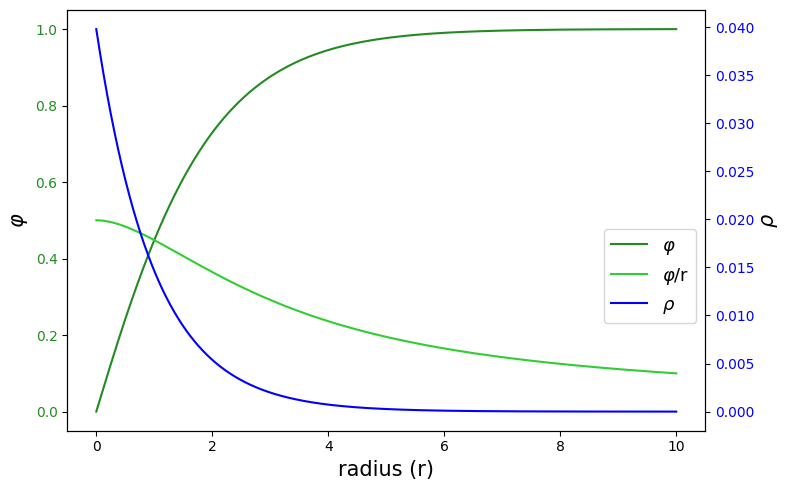

In [ ]:
r0 = 0.0
rk = 10.0
n = 10000

rh = (rk - r0) / n
yp1 = 0.0
yp2 = 1.0 - ((rh + 2.0) / 2.0) * exp(-rh)

r1, phi1 = analytical_phi(r0, rk, n)
r2, rho2 = get_rho(r0, rk, n)

#plt.figure()
fig, ax1 = plt.subplots(figsize = (8, 5))

color = 'forestgreen'
ax1.set_xlabel('radius (r)', fontsize=15)
ax1.set_ylabel('$\u03C6$', fontsize=15)
ax1.plot(r1, phi1, label='$\u03C6$', color=color)
ax1.tick_params(axis='y', labelcolor=color)
color = 'limegreen'
ax1.plot(r1[1:], [phi / r for r, phi in zip(r1[1:], phi1[1:])],
         label='$\u03C6$/r', color=color)

color = 'blue'
ax2 = ax1.twinx()
ax2.set_ylabel('$\u03C1$', fontsize=15)
ax2.plot(r2, rho2, label='$\u03C1$', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.legend(bbox_to_anchor=(1, 0.5), bbox_transform=ax1.transAxes, fontsize=13)
fig.tight_layout()

plt.show()

### 5.4.2 Comparison of the Approximation 𝝋(h) = 0.5h with the Analytical Solution (for small values of the grid parameter h)


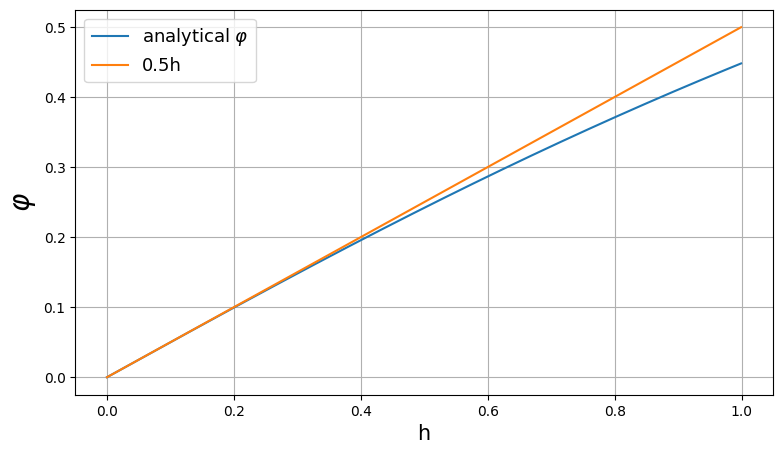

In [ ]:
r, phi_lst  = analytical_phi(0, 1, 1000)

plt.figure(figsize=(9, 5))
plt.plot(r, phi_lst, label='analytical $\u03C6$')
plt.plot(r, [0.5 * h for h in r], label='0.5h')
plt.xlabel('h', fontsize=15)
plt.ylabel('$\u03C6$', fontsize=20)
plt.legend(fontsize=13)
plt.grid()
plt.show()

#### Determining the 𝝋(r) Dependency for Small Changes in 𝝋(h) <br> for Three Selected Values of the Grid Parameter h


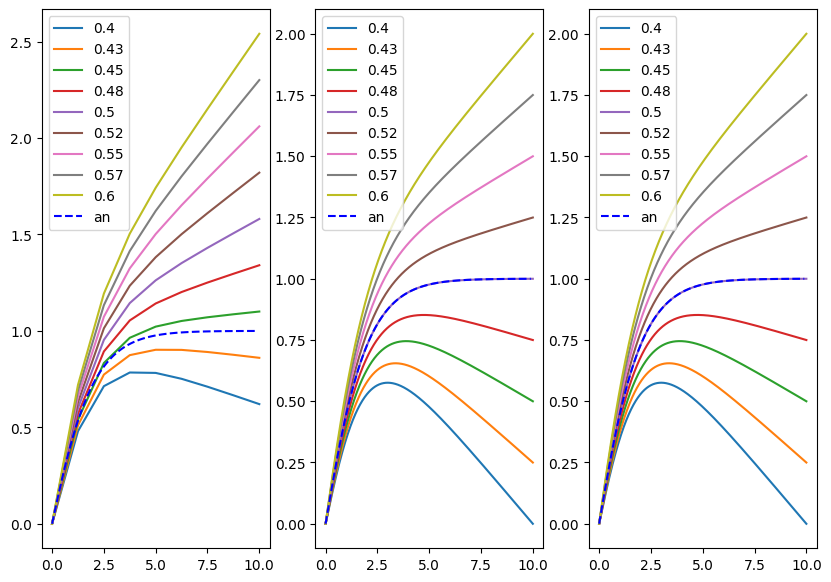

In [ ]:
r0 = 0
rk = 10
r_an, phi_an = analytical_phi(r0, rk, 100)
h_lst = [1.2, 0.01, 0.001]

plt.figure(figsize=(10, 7))

for idx in range(len(h_lst)):
    plt.subplot(1, 3, idx + 1)
    for rh in np.linspace(0.4 * h_lst[idx], 0.6 * h_lst[idx], 9):
        n = int((rk - r0) / h_lst[idx])
        r_num, phi_num = numerow(r0, rk, n, 0.0, rh, k2, s)
        plt.plot(r_num, phi_num, label=str(round(rh / h_lst[idx], 2)))
    plt.plot(r_an, phi_an, 'b--', label='an', markersize=3)
    plt.legend()

plt.show()

### 5.4.3 Modification of the Code to Make the Numerov Scheme Work  by Starting the Recursive Formula at Infinity

*   infinity = sufficiently far
*   compare with analytical results (plot)

In [ ]:
def numerow2(a, b, ndiv, yk, y, funk, funs):
    """
    Solve second order differential equations using modified Numerow's method.

    Parameters
    ----------
    a : float
        Left endpoint of the interval.
    b : float
        Right endpoint of the interval.
    ndiv : int
        Number of divisions.
    yk : float
        Initial value at right endpoint.
    y : float
        Value at second-to-right endpoint.
    funk : function
        Function of x to be multiplied by y in the differential equation.
    funs : function
        Function of x to be added to the differential equation.

    Returns
    -------
    xp : array_like
        Array of x values.
    yp : array_like
        Array of y values.

    """
    h = (b - a) / ndiv
    xp = [b, b - h]
    yp = [yk, y]
    for i in range(1, ndiv):
        xp.append(xp[i] - h)
        yp.append((2.0 * yp[i] - yp[i - 1]
                   * (1.0 + h * h * funk(xp[i - 1]) / 12.0)
                   + h * h / 12.0 * (funs(xp[i + 1])
                   + 10.0 * funs(xp[i]) + funs(xp[i - 1]))))
    return xp, yp

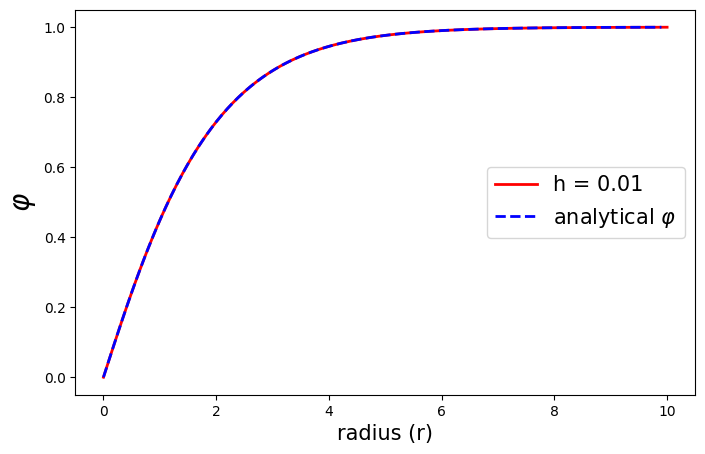

In [ ]:
h = 0.01
r0 = 0.0
rk = 10.0
n = int((rk - r0) / h)

r_an, phi_an = analytical_phi(r0, rk, 100)
r_rev, phi_rev = numerow2(r0, rk, n, phi(10), phi(10 - h), k2, s)

plt.figure(figsize=(8, 5))
plt.xlabel('radius (r)', fontsize=15)
plt.ylabel('$\u03C6$', fontsize=20)
plt.plot(r_rev, phi_rev, 'r', label='h = ' + str(round(h, 2)), linewidth=2)
plt.plot(r_an, phi_an, 'b--', label='analytical $\u03C6$',
         markersize=3, linewidth=2)
plt.legend(loc='right', fontsize=15)
plt.show()

### 5.4.4 Extending the Code with Calculations of the Gravitational Field

*   calculate gravitational acceleration and gravitational force
*   determine the radius of the star as the distance from the center to the point where the force is maximum

In [ ]:
def mass(r):
    """
    Calculate the mass enclosed within a given radius.

    Parameters
    ----------
    r : float
        The radius at which to calculate the mass.

    Returns
    -------
    float
        The mass enclosed within the given radius.

    Notes
    -----
    This function assumes a spherically symmetric mass distribution with
    density given by the function rho(r).
    """
    return (4 / 3 * pi * r ** 3) * rho(r)

def deriv(r, h, func):
    """
    Calculate the numerical derivative of a function at a point using
    the central difference method.

    Parameters
    ----------
    r : float
        Point at which to evaluate the derivative.
    h : float
        Step size for the approximation.
    func : funtion
        Function to differentiate.

    Returns
    -------
    float
        Numerical derivative of this function.
    """
    return (func(r + h) - func(r - h)) / 2.0 / h

def calculate_force(r0, rk, h):
    """
    Calculate gravitational force for given range of distances.

    Parameters
    ----------
    r0 : float
        Starting distance.
    rk : float
        Ending distance.
    h : float
        Step size for distance.

    Returns
    -------
    Tuple[List[float], List[float], List[float]]
        Returns a tuple containing three lists: distance (r), acceleration
        due to gravity (ag), and gravitational force (f).

    Notes
    -----
    This function calculates gravitational force for a given range of distances
    using the formula:
    acceleration due to gravity (ag) = - d(phi) / dr
    gravitational force (f) = mass(r) * ag
    where phi is the gravitational potential of a planet and mass(r) is the mass
     enclosed within a radius r.
    """
    ag = []
    f = []
    r = []
    for rh in np.arange(r0, rk, h):
        r.append(rh)
        a = -deriv(rh, 10 ** -5, phi)
        ag.append(a)
        f.append(a * mass(rh))
    return r, ag, f

Radius of the star: r =  1.823


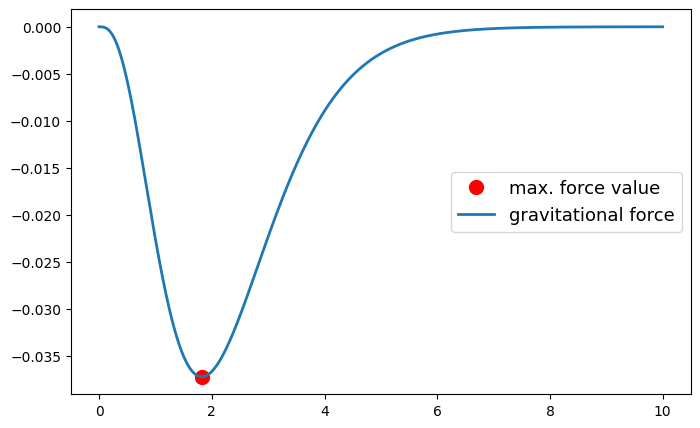

In [ ]:
r_a, ag, f = calculate_force(0, 10, 0.001)
index_min = np.argmin(f)
print('Radius of the star: r = ', r_a[index_min])

plt.figure(figsize=(8, 5))
plt.plot(r_a[index_min], f[index_min], 'ro', label='max. force value',
         markersize=10)
plt.plot(r_a, f, label='gravitational force', linewidth=2)
plt.legend(loc='right', fontsize=13)
plt.show()